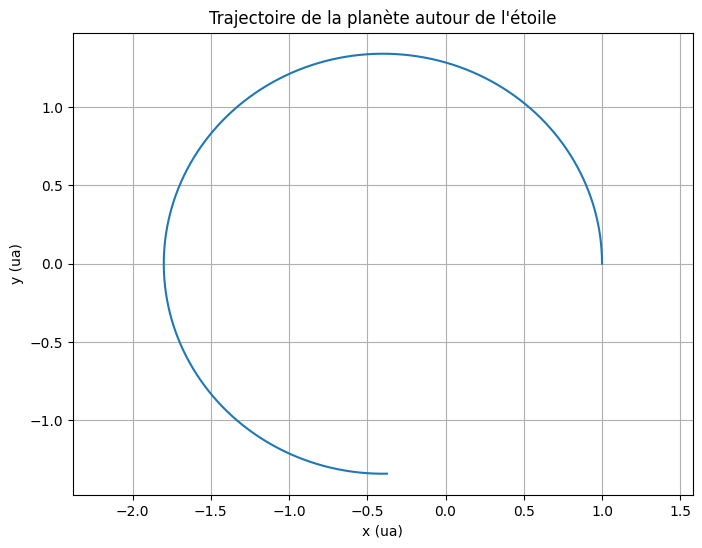

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Constantes de la simulation
G = 4 * np.pi**2  # Constante gravitationnelle dans les unités astronomiques
dt = 0.000001        # Pas de temps
T = 1             # Période d'une année
N = int(T / dt)   # Nombre d'itérations pour couvrir une période

# Arrays pour stocker les positions et vitesses
x = np.zeros(N)
y = np.zeros(N)
vx = np.zeros(N)
vy = np.zeros(N)

# Conditions initiales
x[0] = 1  # position x initiale au périhélie
y[0] = 0    # position y initiale
vx[0] = 0   # vitesse initiale en x
vy[0] = np.sqrt(G / x[0])  # vitesse initiale en y pour une orbite elliptique

# Méthode de Beeman pour résoudre les équations du mouvement
for n in range(N-1):
    r = np.sqrt(x[n]**2 + y[n]**2)
    ax = -(G * x[n] / r**3)
    ay = -(G * y[n] / r**3)
    
    # Prédiction des positions et vitesses
    x_pred = x[n] + vx[n] * dt + 0.5 * ax * dt**2
    y_pred = y[n] + vy[n] * dt + 0.5 * ay * dt**2
    vx_pred = vx[n] + ax * dt
    vy_pred = vy[n] + ay * dt
    
    # Correction des valeurs
    r_pred = np.sqrt(x_pred**2 + y_pred**2)
    ax_pred = -(G * x_pred / r_pred**3)
    ay_pred = -(G * y_pred / r_pred**3)
    
    x[n+1] = x[n] + vx[n] * dt + (4*vx_pred - vx[n])/6 * dt
    y[n+1] = y[n] + vy[n] * dt + (4*vy_pred - vy[n])/6 * dt
    vx[n+1] = vx[n] + (2*ax_pred + 5*ax)/6 * dt
    vy[n+1] = vy[n] + (2*ay_pred + 5*ay)/6 * dt

# Tracé de la trajectoire
plt.figure(figsize=(8, 6))
plt.plot(x, y)
plt.title('Trajectoire de la planète autour de l\'étoile')
plt.xlabel('x (ua)')
plt.ylabel('y (ua)')
plt.axis('equal')
plt.grid(True)
plt.show()
